In [45]:
import pandas as pd
import numpy as np
import sqlite3
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET

conn = sqlite3.connect("D:/Datasets/soccer/database.sqlite")
data = pd.read_sql_query("select date, goal  from Match WHERE home_team_api_id=10260;", conn)

In [46]:
data = data.dropna()

In [47]:
data

,date,goal
0,2008-08-17 00:00:00,<goal><value><comment>n</comment><stats><goals...
1,2008-10-29 00:00:00,<goal><value><comment>n</comment><stats><goals...
2,2008-11-01 00:00:00,<goal><value><comment>n</comment><stats><goals...
3,2008-11-15 00:00:00,<goal><value><comment>n</comment><stats><goals...
4,2008-12-06 00:00:00,<goal><value><comment>n</comment><stats><goals...
...,...,...
147,2016-04-16 00:00:00,<goal><value><comment>n</comment><stats><goals...
148,2016-05-01 00:00:00,<goal><value><comment>n</comment><stats><goals...
149,2016-05-17 00:00:00,<goal><value><comment>n</comment><stats><goals...
150,2015-09-12 00:00:00,<goal><value><comment>n</comment><stats><goals...


In [64]:
def read_goal(goal):
    root = ET.fromstring(goal)
    i = 0
    for child in root:
        i += 1
    return i

In [67]:
read_goal(data["goal"][18])


5

In [68]:
for i in range(len(data["goal"].values)):
    data["goal"][i] = read_goal(data["goal"][i])

In [69]:
data

,date,goal
0,2008-08-17 00:00:00,2
1,2008-10-29 00:00:00,2
2,2008-11-01 00:00:00,8
3,2008-11-15 00:00:00,5
4,2008-12-06 00:00:00,1
...,...,...
147,2016-04-16 00:00:00,1
148,2016-05-01 00:00:00,2
149,2016-05-17 00:00:00,4
150,2015-09-12 00:00:00,4


In [70]:
data["date"]= pd.to_datetime(data["date"])

data

,date,goal
0,2008-08-17,2
1,2008-10-29,2
2,2008-11-01,8
3,2008-11-15,5
4,2008-12-06,1
...,...,...
147,2016-04-16,1
148,2016-05-01,2
149,2016-05-17,4
150,2015-09-12,4


In [73]:
scaler = MinMaxScaler()

date_scaled = scaler.fit_transform(data["date"].values.reshape(-1, 1))
goal_scaled = scaler.fit_transform(data["goal"].values.reshape(-1, 1))




D:\Users\Chubak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Users\Chubak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.18181818],
       [0.18181818],
       [0.72727273],
       [0.45454545],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.27272727],
       [0.09090909],
       [0.36363636],
       [0.36363636],
       [0.45454545],
       [0.45454545],
       [0.45454545],
       [0.63636364],
       [0.18181818],
       [0.        ],
       [0.18181818],
       [0.45454545],
       [0.09090909],
       [0.36363636],
       [0.36363636],
       [0.09090909],
       [0.27272727],
       [0.45454545],
       [0.27272727],
       [0.36363636],
       [0.45454545],
       [0.27272727],
       [0.27272727],
       [0.36363636],
       [0.27272727],
       [0.36363636],
       [0.36363636],
       [0.36363636],
       [0.63636364],
       [0.36363636],
       [0.27272727],
       [0.27272727],
       [0.18181818],
       [0.27272727],
       [0.18181818],
       [0.72727273],
       [0.18181818],
       [0.18181818],
       [0.27272727],
       [0.45454545],
       [0.363

In [75]:
goal_scaled

array([[0.18181818],
       [0.18181818],
       [0.72727273],
       [0.45454545],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.27272727],
       [0.09090909],
       [0.36363636],
       [0.36363636],
       [0.45454545],
       [0.45454545],
       [0.45454545],
       [0.63636364],
       [0.18181818],
       [0.        ],
       [0.18181818],
       [0.45454545],
       [0.09090909],
       [0.36363636],
       [0.36363636],
       [0.09090909],
       [0.27272727],
       [0.45454545],
       [0.27272727],
       [0.36363636],
       [0.45454545],
       [0.27272727],
       [0.27272727],
       [0.36363636],
       [0.27272727],
       [0.36363636],
       [0.36363636],
       [0.36363636],
       [0.63636364],
       [0.36363636],
       [0.27272727],
       [0.27272727],
       [0.18181818],
       [0.27272727],
       [0.18181818],
       [0.72727273],
       [0.18181818],
       [0.18181818],
       [0.27272727],
       [0.45454545],
       [0.363

In [80]:
goal_date_df = pd.DataFrame({"Date": date_scaled.flatten(), "Goal": goal_scaled.flatten()})

In [81]:
goal_date_df

,Date,Goal
0,0.000000,0.181818
1,0.025795,0.181818
2,0.026855,0.727273
3,0.031802,0.454545
4,0.039223,0.090909
...,...,...
147,0.989046,0.090909
148,0.994346,0.181818
149,1.000000,0.363636
150,0.912367,0.363636


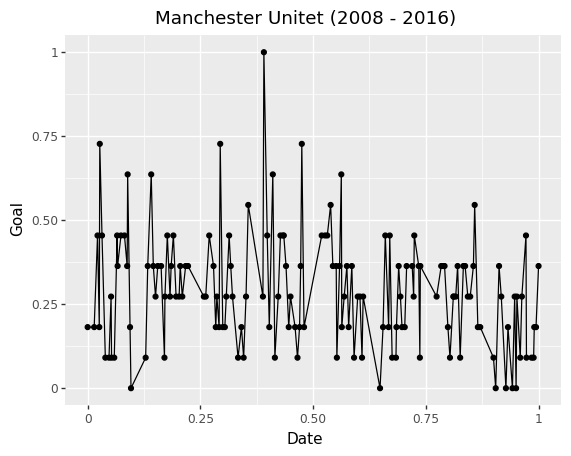

<ggplot: (140758572976)>

In [84]:
from plotnine import *

ggplot(goal_date_df, aes(x="Date", y="Goal")) + geom_line() + geom_point() + labs(title="Manchester Unitet (2008 - 2016)")

In [89]:
X = goal_date_df["Date"].values.reshape(152, 1, 1)
y = goal_date_df["Goal"].values.flatten()



In [164]:
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(100, input_shape=(1, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dropout(0.2))
model.add(Dense(1, activation="selu"))

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 100)            40800     
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 150)            150600    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 150)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 200)               280800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [165]:
model.compile(loss="mse", optimizer="adam", metrics=["acc"])

In [170]:
history = model.fit(X, y, epochs=20, batch_size=72, validation_split=0.2)

Train on 121 samples, validate on 31 samples
Epoch 1/20
121/121 [==============================] - 0s 520us/step - loss: 0.0294 - acc: 0.0165 - val_loss: 0.0297 - val_acc: 0.1290
Epoch 2/20
121/121 [==============================] - 0s 347us/step - loss: 0.0289 - acc: 0.0165 - val_loss: 0.0300 - val_acc: 0.1290
Epoch 3/20
121/121 [==============================] - 0s 322us/step - loss: 0.0289 - acc: 0.0165 - val_loss: 0.0303 - val_acc: 0.1290
Epoch 4/20
121/121 [==============================] - 0s 347us/step - loss: 0.0291 - acc: 0.0165 - val_loss: 0.0305 - val_acc: 0.1290
Epoch 5/20
121/121 [==============================] - 0s 338us/step - loss: 0.0285 - acc: 0.0165 - val_loss: 0.0306 - val_acc: 0.1290
Epoch 6/20
121/121 [==============================] - 0s 347us/step - loss: 0.0289 - acc: 0.0165 - val_loss: 0.0307 - val_acc: 0.1290
Epoch 7/20
121/121 [==============================] - 0s 330us/step - loss: 0.0291 - acc: 0.0165 - val_loss: 0.0304 - val_acc: 0.1290
Epoch 8/20
121/12

In [142]:
years_pred = np.array(pd.date_range(start='1/1/2020', end='1/12/2028', freq='15D', 
                                    normalize=True).date.astype('str'))
years_dt = np.asarray(pd.to_datetime(years_pred))
years_pred_scaled = scaler.fit_transform(years_dt.reshape(-1, 1))
years_pred_scaled

D:\Users\Chubak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.        ],
       [0.00512821],
       [0.01025641],
       [0.01538462],
       [0.02051282],
       [0.02564103],
       [0.03076923],
       [0.03589744],
       [0.04102564],
       [0.04615385],
       [0.05128205],
       [0.05641026],
       [0.06153846],
       [0.06666667],
       [0.07179487],
       [0.07692308],
       [0.08205128],
       [0.08717949],
       [0.09230769],
       [0.0974359 ],
       [0.1025641 ],
       [0.10769231],
       [0.11282051],
       [0.11794872],
       [0.12307692],
       [0.12820513],
       [0.13333333],
       [0.13846154],
       [0.14358974],
       [0.14871795],
       [0.15384615],
       [0.15897436],
       [0.16410256],
       [0.16923077],
       [0.17435897],
       [0.17948718],
       [0.18461538],
       [0.18974359],
       [0.19487179],
       [0.2       ],
       [0.20512821],
       [0.21025641],
       [0.21538462],
       [0.22051282],
       [0.22564103],
       [0.23076923],
       [0.23589744],
       [0.241

In [148]:
years_pred_scaled = years_pred_scaled.reshape(196, 1, 1)

In [167]:
goals_pred = model.predict(years_pred_scaled)

In [168]:
pred_df = pd.DataFrame({"Date": years_pred_scaled.flatten(), "Goal": goals_pred.flatten()})

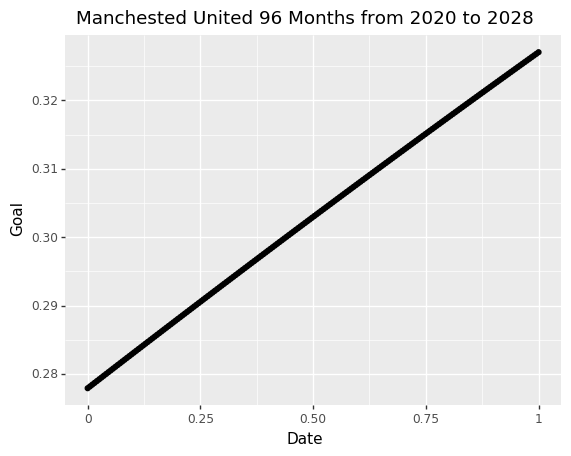

<ggplot: (140843693320)>

In [169]:
ggplot(pred_df, aes(x="Date", y="Goal")) +\
geom_line() +\
geom_point() +\
labs(title="Manchested United 96 Months from 2020 to 2028")

In [160]:
goal_date_df["Goal"][0:152:5]

0      0.181818
5      0.090909
10     0.363636
15     0.181818
20     0.363636
25     0.272727
30     0.363636
35     0.636364
40     0.272727
45     0.272727
50     0.090909
55     0.454545
60     0.454545
65     0.272727
70     0.363636
75     0.636364
80     0.636364
85     0.181818
90     0.090909
95     0.090909
100    0.272727
105    0.363636
110    0.181818
115    0.090909
120    0.090909
125    0.363636
130    0.363636
135    0.181818
140    0.090909
145    0.181818
150    0.363636
Name: Goal, dtype: float64